In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

import sys
sys.path.append('/mnt/disk1/yunseob/Pytorch/SSM/0_modules')
from SSM_utils import Reshape4torch, GenerateLabel
from SSM_DL_training import CNN_Training

# Load Data

In [2]:
data_dir = '/mnt/disk2/data/private_data/SSM/2_Mockup/1_AE_Accel_Data/2_NOISE_GN/-10db'

def GBdataLoad2(data_dir, phase = 'train', data = 'AE'):
    for i in os.listdir(data_dir):
        if 'good' in i and phase in i and data in i:
            G_X = np.load(os.path.join(data_dir, i))
        elif 'bad' in i and phase in i and data in i:
            B_X = np.load(os.path.join(data_dir, i))
            
    def add_ch(img):
        """
        (sample #, height, width,) -> (sample #, height, width, channel)
        """
        return np.expand_dims(img, axis = -1)
    
    G_X, B_X = add_ch(G_X), add_ch(B_X)
    G_X, B_X = Reshape4torch(G_X), Reshape4torch(B_X)

    return G_X, B_X

G_X, B_X = GBdataLoad2(data_dir, phase = 'train', data = 'AE')

G_Y, B_Y = GenerateLabel(G_X, 0), GenerateLabel(B_X, 1)

print('GOOD:', G_X.shape, 'BAD', B_X.shape)

GB_X = [G_X, B_X]
GB_Y = [G_Y, B_Y]

GOOD: (2822, 1, 40, 40) BAD (2510, 1, 40, 40)


0 (2822, 1, 40, 40) (2822,)
0 train: (2539, 1, 40, 40) (2539,) valid: (283, 1, 40, 40) (283,)
1 (2510, 1, 40, 40) (2510,)
1 train: (2259, 1, 40, 40) (2259,) valid: (251, 1, 40, 40) (251,)

Device: GeForce RTX 2080 Ti 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 40, 40]             640
            Conv2d-2           [-1, 64, 40, 40]          36,928
       BatchNorm2d-3           [-1, 64, 40, 40]             128
         MaxPool2d-4           [-1, 64, 20, 20]               0
            Conv2d-5           [-1, 64, 20, 20]          36,928
            Conv2d-6           [-1, 64, 20, 20]          36,928
       BatchNorm2d-7           [-1, 64, 20, 20]             128
         MaxPool2d-8           [-1, 64, 10, 10]               0
            Conv2d-9           [-1, 64, 10, 10]          36,928
           Conv2d-10           [-1, 64, 10, 10]          36,928
      BatchN

00740 | train_loss: 0.11725, train_accr: 0.955 | val_loss: 0.10130, val_accr: 0.965
00750 | train_loss: 0.04714, train_accr: 0.995 | val_loss: 0.11400, val_accr: 0.960
00760 | train_loss: 0.05872, train_accr: 0.990 | val_loss: 0.11229, val_accr: 0.955
00770 | train_loss: 0.04849, train_accr: 0.995 | val_loss: 0.11468, val_accr: 0.960
00780 | train_loss: 0.06834, train_accr: 0.975 | val_loss: 0.17301, val_accr: 0.935
00790 | train_loss: 0.06009, train_accr: 0.985 | val_loss: 0.10910, val_accr: 0.965
00800 | train_loss: 0.07789, train_accr: 0.975 | val_loss: 0.08181, val_accr: 0.975
00810 | train_loss: 0.07023, train_accr: 0.975 | val_loss: 0.14444, val_accr: 0.955
00820 | train_loss: 0.08403, train_accr: 0.980 | val_loss: 0.08387, val_accr: 0.980
00830 | train_loss: 0.05143, train_accr: 0.985 | val_loss: 0.10996, val_accr: 0.955
00840 | train_loss: 0.06727, train_accr: 0.980 | val_loss: 0.10710, val_accr: 0.960
00850 | train_loss: 0.05404, train_accr: 0.985 | val_loss: 0.07812, val_accr

01720 | train_loss: 0.00316, train_accr: 1.000 | val_loss: 0.06728, val_accr: 0.980
01730 | train_loss: 0.00583, train_accr: 1.000 | val_loss: 0.10916, val_accr: 0.970
01740 | train_loss: 0.00610, train_accr: 1.000 | val_loss: 0.09998, val_accr: 0.965
01750 | train_loss: 0.00535, train_accr: 1.000 | val_loss: 0.09362, val_accr: 0.960
01760 | train_loss: 0.00303, train_accr: 1.000 | val_loss: 0.17373, val_accr: 0.955
01770 | train_loss: 0.00569, train_accr: 1.000 | val_loss: 0.06058, val_accr: 0.975
01780 | train_loss: 0.00385, train_accr: 1.000 | val_loss: 0.09331, val_accr: 0.960
01790 | train_loss: 0.00601, train_accr: 1.000 | val_loss: 0.05315, val_accr: 0.990
01800 | train_loss: 0.00393, train_accr: 1.000 | val_loss: 0.10770, val_accr: 0.975
01810 | train_loss: 0.00388, train_accr: 1.000 | val_loss: 0.09026, val_accr: 0.975
01820 | train_loss: 0.00409, train_accr: 1.000 | val_loss: 0.10418, val_accr: 0.975
01830 | train_loss: 0.00539, train_accr: 1.000 | val_loss: 0.03917, val_accr

02700 | train_loss: 0.00081, train_accr: 1.000 | val_loss: 0.20025, val_accr: 0.965
02710 | train_loss: 0.00126, train_accr: 1.000 | val_loss: 0.07259, val_accr: 0.965
02720 | train_loss: 0.00091, train_accr: 1.000 | val_loss: 0.11640, val_accr: 0.955
02730 | train_loss: 0.00108, train_accr: 1.000 | val_loss: 0.14242, val_accr: 0.970
02740 | train_loss: 0.00177, train_accr: 1.000 | val_loss: 0.08497, val_accr: 0.970
02750 | train_loss: 0.00081, train_accr: 1.000 | val_loss: 0.09446, val_accr: 0.980
02760 | train_loss: 0.00100, train_accr: 1.000 | val_loss: 0.07820, val_accr: 0.975
02770 | train_loss: 0.00100, train_accr: 1.000 | val_loss: 0.14761, val_accr: 0.975
02780 | train_loss: 0.00102, train_accr: 1.000 | val_loss: 0.08363, val_accr: 0.965
02790 | train_loss: 0.00159, train_accr: 1.000 | val_loss: 0.21878, val_accr: 0.955
02800 | train_loss: 0.00089, train_accr: 1.000 | val_loss: 0.13902, val_accr: 0.965
02810 | train_loss: 0.00085, train_accr: 1.000 | val_loss: 0.14302, val_accr

03680 | train_loss: 0.00035, train_accr: 1.000 | val_loss: 0.05078, val_accr: 0.985
03690 | train_loss: 0.00047, train_accr: 1.000 | val_loss: 0.09736, val_accr: 0.985
03700 | train_loss: 0.00068, train_accr: 1.000 | val_loss: 0.21215, val_accr: 0.965
03710 | train_loss: 0.00038, train_accr: 1.000 | val_loss: 0.03638, val_accr: 0.975
03720 | train_loss: 0.00052, train_accr: 1.000 | val_loss: 0.12652, val_accr: 0.975
03730 | train_loss: 0.00046, train_accr: 1.000 | val_loss: 0.07649, val_accr: 0.980
03740 | train_loss: 0.00044, train_accr: 1.000 | val_loss: 0.10213, val_accr: 0.955
03750 | train_loss: 0.00045, train_accr: 1.000 | val_loss: 0.18058, val_accr: 0.955
03760 | train_loss: 0.00060, train_accr: 1.000 | val_loss: 0.06632, val_accr: 0.960
03770 | train_loss: 0.00053, train_accr: 1.000 | val_loss: 0.08825, val_accr: 0.970
03780 | train_loss: 0.00081, train_accr: 1.000 | val_loss: 0.13007, val_accr: 0.960
03790 | train_loss: 0.00048, train_accr: 1.000 | val_loss: 0.07957, val_accr

04660 | train_loss: 0.00020, train_accr: 1.000 | val_loss: 0.20275, val_accr: 0.965
04670 | train_loss: 0.00030, train_accr: 1.000 | val_loss: 0.07822, val_accr: 0.965
04680 | train_loss: 0.00030, train_accr: 1.000 | val_loss: 0.13879, val_accr: 0.975
04690 | train_loss: 0.00016, train_accr: 1.000 | val_loss: 0.10286, val_accr: 0.985
04700 | train_loss: 0.00024, train_accr: 1.000 | val_loss: 0.15838, val_accr: 0.960
04710 | train_loss: 0.00025, train_accr: 1.000 | val_loss: 0.30903, val_accr: 0.945
04720 | train_loss: 0.00022, train_accr: 1.000 | val_loss: 0.13857, val_accr: 0.975
04730 | train_loss: 0.00016, train_accr: 1.000 | val_loss: 0.18626, val_accr: 0.950
04740 | train_loss: 0.00014, train_accr: 1.000 | val_loss: 0.12979, val_accr: 0.965
04750 | train_loss: 0.00025, train_accr: 1.000 | val_loss: 0.09068, val_accr: 0.980
04760 | train_loss: 0.00016, train_accr: 1.000 | val_loss: 0.14396, val_accr: 0.970
04770 | train_loss: 0.00013, train_accr: 1.000 | val_loss: 0.22992, val_accr

/home/yunseob/Pytorch/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


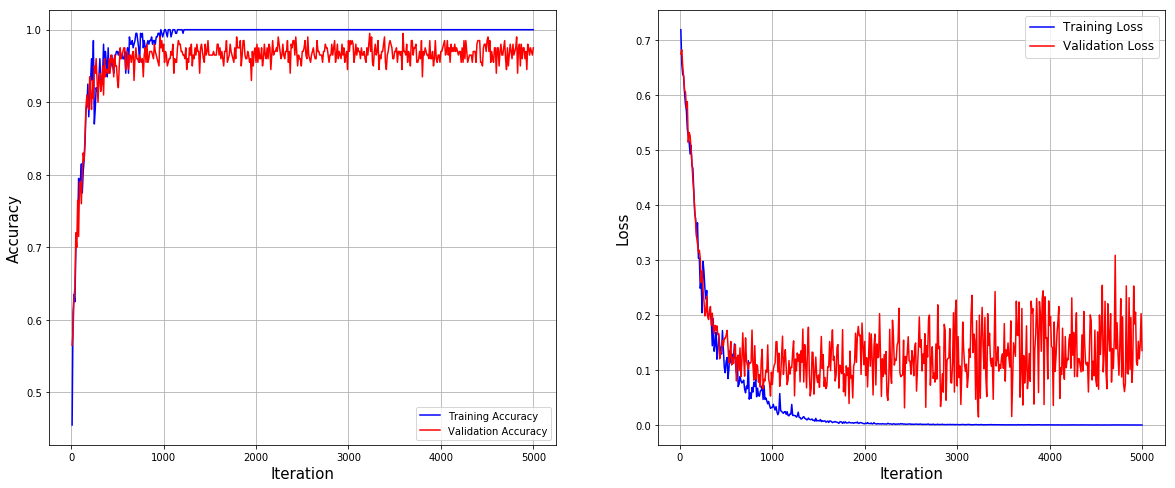

Best Model: GB_GN_-10dB_AE_2004080347_00980_loss_0.036373_val_loss_0.070484.pt


In [3]:
CT = CNN_Training(GB_X, GB_Y, n_ch = 1, n_cls = 2, lr = 0.00001, n_batch_per_cls = 100, n_iter = 5000, model_name = 'GB_GN_-10dB_AE', GPU_idx = 3)

CT.Run(model_dir = './model/', hist_dir = './results/0_train_hist/npy/')